In [1]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

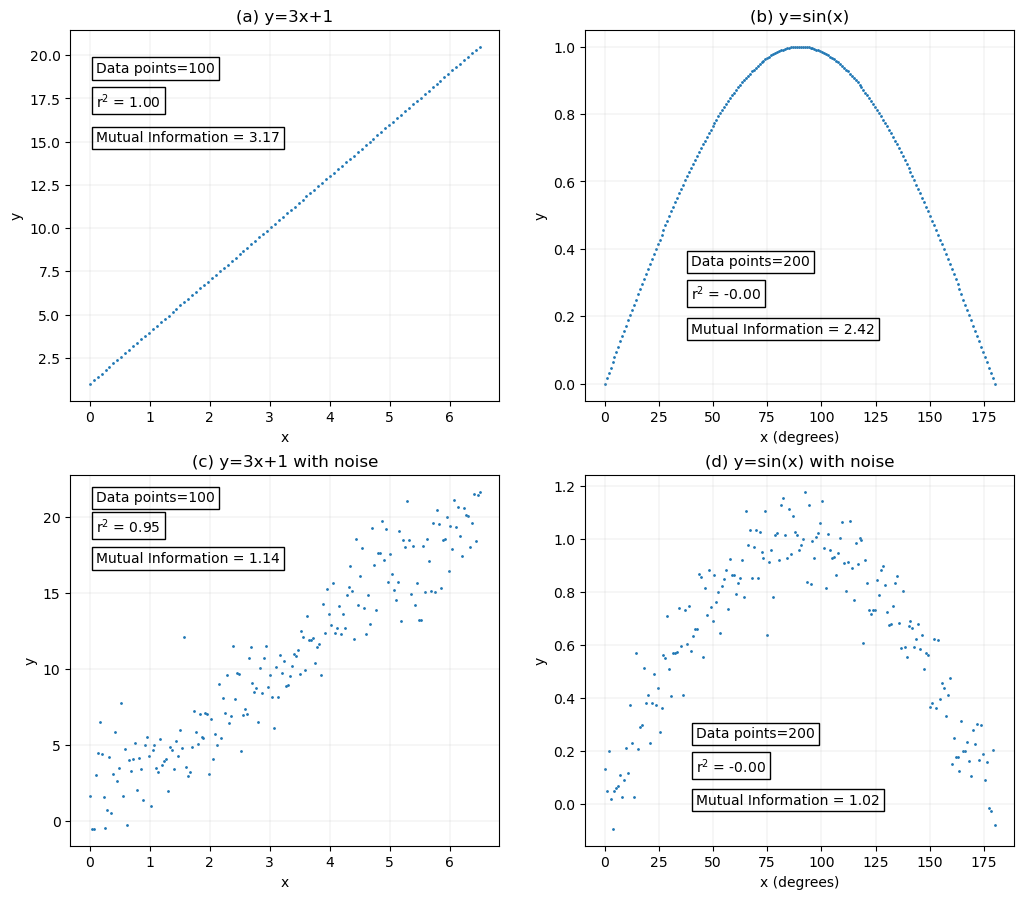

In [2]:
## lets create a linear dataset without any noise

x=np.linspace(0.0,6.5,num=100) ## create x axis point
y=3*x+1   ## equation

line_corr=pearsonr(x,y)[0] ## calculating the pearson correlation coefficient

X=x.reshape(-1,1) ## reshape from (100,) to (100,1). 
Y=y.reshape(-1,1)

MI=mutual_info_regression(X,Y)


#plt.figure(figsize=(5,5))

plt.subplot(2,2,1)

plt.scatter(x,y,s=1)

plt.text(0.1,17, '$\mathrm{r^2}$ = %3.2f' % (line_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,15, 'Mutual Information = %3.2f' % (MI),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,19, 'Data points=100',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(a) y=3x+1", fontsize=12)
plt.grid(axis='both',linewidth=0.15)



## Lets now create a plot for the sine wave without any noise

a=np.linspace(0,180, num=200) ## the point in the x axis

b=[]
 
for i in range(len(a)):
    b.append(math.sin(math.radians(a[i]))) ## calculation sin(x) in degrees
    
A=a.reshape(-1,1) ## reshape the array
B_initial=np.array(b) ## transform type to array
B=B_initial.reshape(-1,1) ## reshape the array

sin_corr=pearsonr(a,b)[0] ## calculating the pearson correlation coefficient

MI_sin=mutual_info_regression(A,B) ## calculating the mutual information

plt.subplot(2,2,2)

plt.scatter(A,B,s=1)

plt.text(40,0.25, '$\mathrm{r^2}$ = %3.2f' % (sin_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(40,0.15, 'Mutual Information = %3.2f' % (MI_sin),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(40,0.35, 'Data points=200',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x (degrees)', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(b) y=sin(x)", fontsize=12)
plt.grid(axis='both',linewidth=0.15)


## lets now add noise to the linear data

x=np.linspace(0.0,6.5,num=200) ## create x axis point

n=np.random.normal(loc=0.0, scale=2.0, size=200) #noise
noise=n.reshape(-1,1)

X=x.reshape(-1,1) ## reshape from (100,) to (100,1). 
Y=3*X+1+noise

XX=X.reshape(-1,) ## reshape to make use in the pearson correlation
YY=Y.reshape(-1,)

line_corr=pearsonr(XX,YY)[0] ## calculating the pearson correlation coefficient
MI=mutual_info_regression(X,Y)

plt.subplot(2,2,3)

plt.scatter(X,Y,s=1)

plt.text(0.1,19, '$\mathrm{r^2}$ = %3.2f' % (line_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,17, 'Mutual Information = %3.2f' % (MI),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(0.1,21, 'Data points=100',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(c) y=3x+1 with noise", fontsize=12)
plt.grid(axis='both',linewidth=0.15)




## Lets now create a plot for the sine wave with noise

a=np.linspace(0,180, num=200) ## the point in the x axis

b=[]
 
for i in range(len(a)):
    b.append(math.sin(math.radians(a[i]))) ## calculation sin(x) in degrees
    

n=np.random.normal(loc=0.0, scale=0.1, size=200) #noise
noise=n.reshape(-1,1)    ## reshape the noise
    

A=a.reshape(-1,1) ## reshape the array
B_initial=np.array(b) ## transform type to array
B=B_initial.reshape(-1,1) ## reshape the array

BB=B+noise

sin_corr=pearsonr(a,b)[0] ## calculating the pearson correlation coefficient

MI_sin=mutual_info_regression(A,BB) ## calculating the mutual information

plt.subplot(2,2,4)

plt.scatter(A,BB,s=1)

plt.text(42,0.12, '$\mathrm{r^2}$ = %3.2f' % (sin_corr),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(42,0.0, 'Mutual Information = %3.2f' % (MI_sin),fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})
plt.text(42,0.25, 'Data points=200',fontsize=10,bbox={'facecolor':'none','edgecolor':'black','boxstyle':'square'})


plt.xlabel('x (degrees)', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.title("(d) y=sin(x) with noise", fontsize=12)
plt.grid(axis='both',linewidth=0.15)


plt.subplots_adjust(bottom=1.5, right=1.6, top=3.2)

plt.show()




# Lets now calculate Mutual information for the Housing Data Set

In [3]:
## Load the data

df1 = pd.read_csv("housing.csv")
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df2 = df1.drop('ocean_proximity', axis=1) ## remove the ocean proxomity column
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
## remove the null values from the total bedrooms feature

housing=df2.dropna(subset=["total_bedrooms"])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [7]:
## lets calculate the mutual information between the 8 features and the target median house value

mutual_info=[]

t=housing[housing.columns[8]] ## the target variable median house value
T=t.to_numpy().reshape((-1,1)) ## transform type tp numpy array and reshape it

for i in range(0,8):
    f=housing[housing.columns[i]] ## i th column
    F=f.to_numpy().reshape((-1,1))  
    
    MI=mutual_info_regression(F,T)  ## calculate the mutual information
    mutual_info.append(MI)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

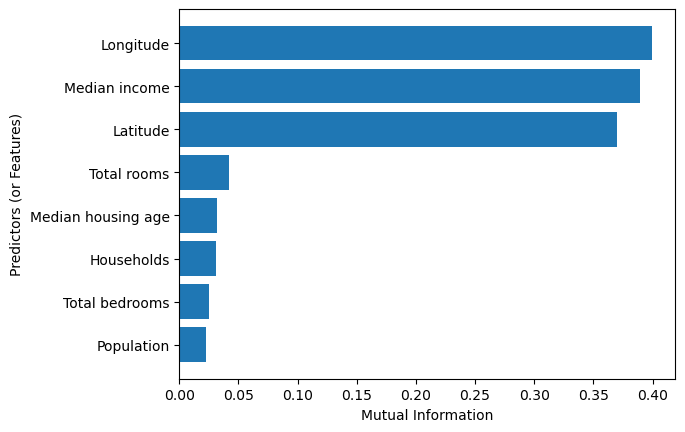

In [8]:
## Lets now plot the bar graph

val=[]       ## Lets get the number from the mutual_info array
for i in range(0,8):
    val.append(mutual_info[i][0])
    
label=['Longitude','Latitude','Median housing age','Total rooms','Total bedrooms','Population','Households',
           'Median income']

feature_list=sorted(zip(val,label),reverse=False)  ## sort the feature list in descending order

## Lets extract the elements of the feature list in terms of values and labels

Values=[]
Labels=[]

for i in range(0,8):
    Values.append(feature_list[i][0])
    
for i in range(0,8):
    Labels.append(feature_list[i][1])


## Lets draw the horizontal bar graph    

plt.barh(Labels,Values)
plt.xlabel("Mutual Information")
plt.ylabel("Predictors (or Features)")


plt.show()


# Regression of the dataset

In [9]:
## Considering the 8 features

features_1=housing.drop("median_house_value",axis=1)
target=housing["median_house_value"].copy()

## split the date into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_1, target, test_size=0.20)


## Lets now train the model using Random Forest

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)

## The train predictions
train_prediction_1=forest_reg.predict(X_train)
train_mse_1=mean_squared_error(y_train,train_prediction_1)
train_rmse_1=np.sqrt(train_mse_1)

print('The train RMSE considering 8 features is:::', '%.2f' % train_rmse_1)

The train RMSE considering 8 features is::: 18257.71


In [10]:
## The test prediction

test_prediction_1=forest_reg.predict(X_test)
test_mse_1=mean_squared_error(y_test,test_prediction_1)
test_rmse_1=np.sqrt(test_mse_1)

print('The test RMSE considering 8 features is:::', '%.2f' % test_rmse_1)

The test RMSE considering 8 features is::: 49176.21


In [11]:
## Now considering only top 7 features

features_2=features_1.drop("population",axis=1)

## split the date into train and test

X_train,X_test,y_train,y_test=train_test_split(features_2, target, test_size=0.20)


## Lets now train the model using Random Forest

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)

## The train predictions

train_prediction_2=forest_reg.predict(X_train)
train_mse_2=mean_squared_error(y_train,train_prediction_2)
train_rmse_2=np.sqrt(train_mse_2)

print('The train RMSE considering 7 features is:::', '%.2f' % train_rmse_2)

The train RMSE considering 7 features is::: 18487.78


In [12]:
## The test prediction

test_prediction_2=forest_reg.predict(X_test)
test_mse_2=mean_squared_error(y_test,test_prediction_2)
test_rmse_2=np.sqrt(test_mse_2)

print('The test RMSE considering 8 features is:::', '%.2f' % test_rmse_2)

The test RMSE considering 8 features is::: 50566.25
